# 트리와 힙 (01/26)
* 큐와 스택은 선형적인 자료구조로 데이터를 나열하는 형태라면, 트리는 계층적으로 나누어져있어 비선형적인 구조의 대표적인 예이다.
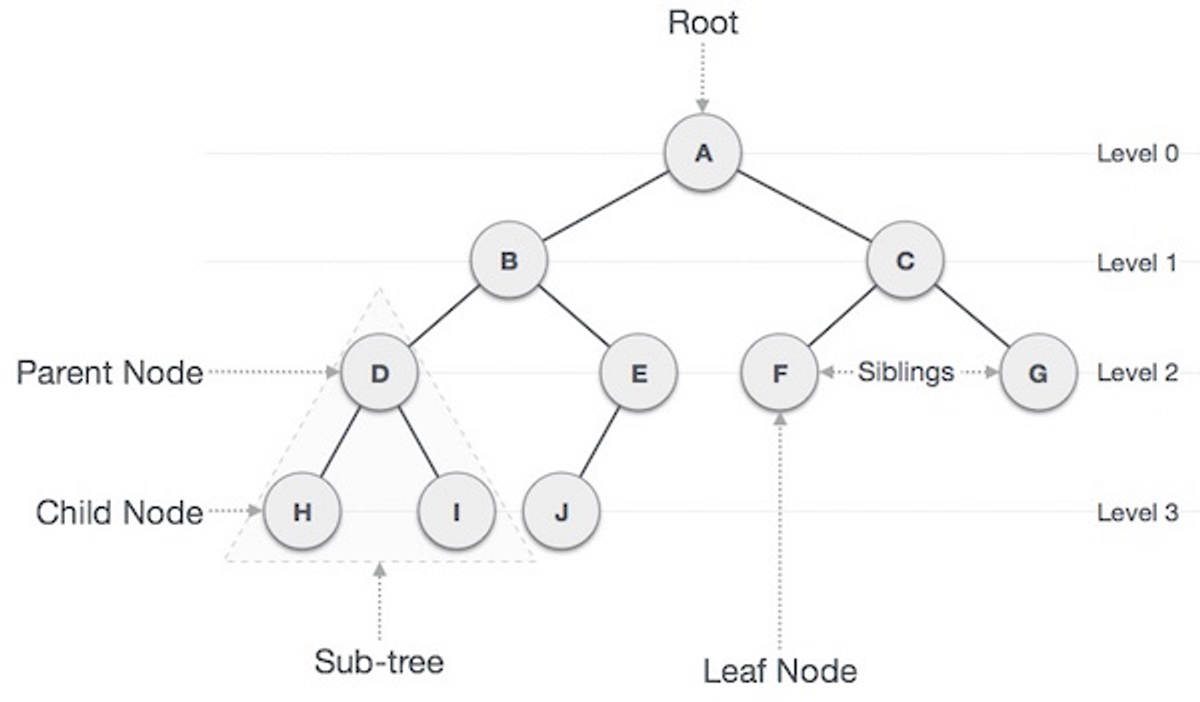
(https://www.google.com/url?sa=i&url=https%3A%2F%2Fplanbs.tistory.com%2Fentry%2F%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0-Tree%EC%99%80-Tree%EC%9D%98-%ED%91%9C%ED%98%84-%EB%B0%A9%EC%8B%9D&psig=AOvVaw07pW3lco-Rf2znUBMf5UBI&ust=1603354258589000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKCdjpqexewCFQAAAAAdAAAAABAF)

* Node: 데이터를 가지고 있는 트리의 구성요소
* Root: 트리의 최상위의 노드
* parent Node, child Node: 특정 노드의 상위, 하위 레벨에 연결된 노드
* left Node (=종단 노드,  terminal): 자식노드를 가지고 있지 않은 노드
* sibling Node: 같은 부모노드를 가지는 노드
* level: root node를 level 0으로 놓았을 때 트리의 각 깊이의 단계
* depth: 트리에서 노드가 가질 수 있는 최대의 level

## 이진트리와 완전이진트리
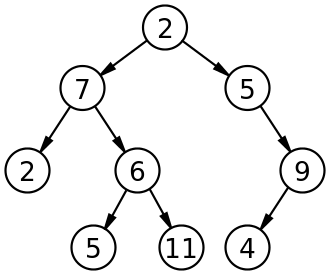
* 이진트리: 각 노드들이 최대 두 개의 자식노드를 가져 무조건 0, 1, 2개만 가져야 함
* (https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%A7%84_%ED%8A%B8%EB%A6%AC)
* (https://ratsgo.github.io/data%20structure&algorithm/2017/10/21/tree/)

* 완전이진트리: 각 노드가 최대 2개의 자식 노드를 갖는 트리 형태(이진트리) 로서 마지막 레벨을 제외한 모든 노드는 완전히 채워져 있어야 함
(https://heytech.tistory.com/105)
    * 마지막 노드는 좌측부터 다 채워져 있어야함
    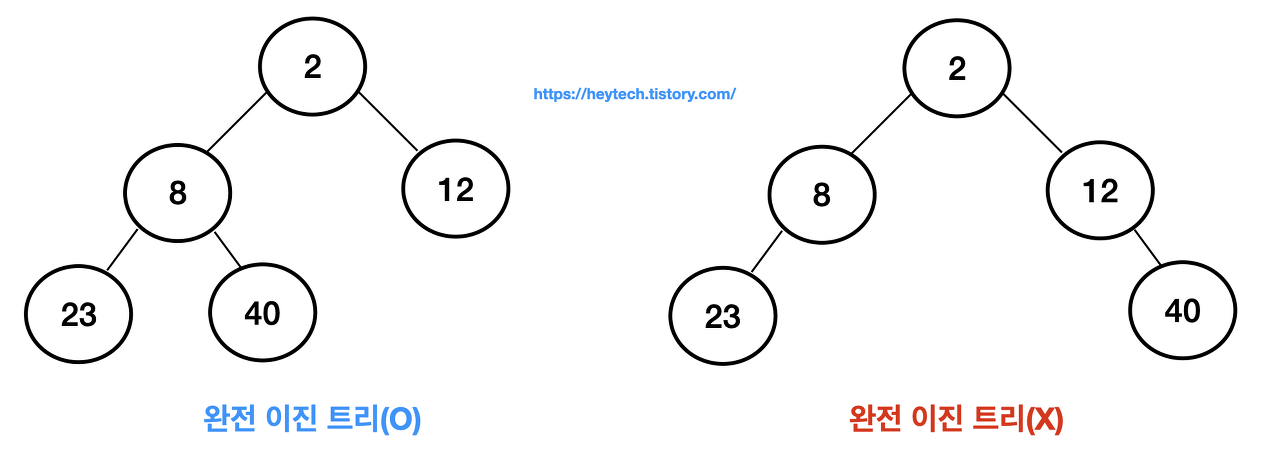

### 완전이진트리 구현

```
트리 구현의 첫 번째 포인트는 0번째 인덱스는 None으로 채운다...!
그래서 배열을 초기화할 때는 [None]으로 시작

      10      Level 0 -> [None, 10] 
    8   5    Level 1 -> [None, 10, 8, 5] 
   6 4 7     Level 2 -> [None, 10, 8, 5, 6, 4, 7]

트리는 위와 같은 배열로 완전이진트리를 구현 시 다음과 같은 식이 성립됨 
* 특정 인덱스 // 2 -> parent node의 index
* 특정 인덱스 * 2 -> 왼쪽 child node의 index
* 특정 인덱스 * 2 + 1 -> 오른쪽 child node의 index
```

# 힙
: 데이터에서 최대값과 최소값을 빠르게 찾기 위해 고안된 완전이진트리
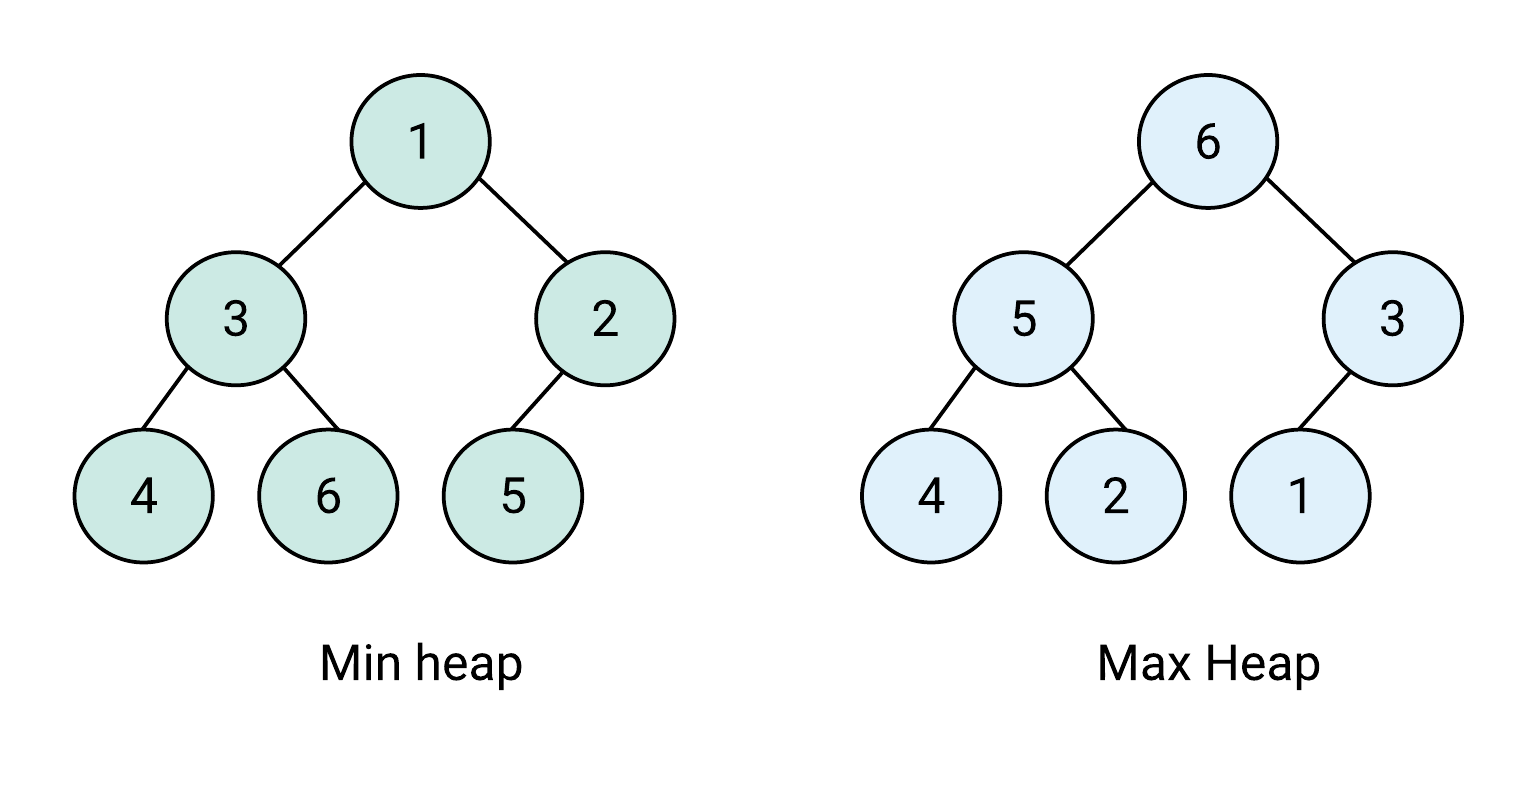

## 파이썬 Heap 직접 구현 (최대힙)
(https://velog.io/@gnwjd309/python-heap)

In [18]:
class Heap:
    def __init__(self):
        # heap 초기화: 배열 생성
        self.heap = []
        # heap 최초 None 넣기
        self.heap.append(None)
        
    # 해당 인덱스의 노드가 부모노드보다 큰지 아닌지 여부를 확인 -> True or False
    # 자식노드 ----> 부모노드 -----> 루트노드
    def check_swap_up(self, idx):
        # idx가 0이거나 1 (None이거나 root) -> 비교할 부모노드가 존재하지 않음 -> False를 반환
        if idx <= 1:
            return False

        # 부모노드를 가지는 index 찾기
        parent_idx = idx // 2
        
        # 부모노드의 값과 비교
        # 크면 True, 그렇지 않으면 False 반환
        if self.heap[idx] > self.heap[parent_idx]:
            return True
        else:
            return False
        
    # 힙에 데이터를 삽입하는 경우
    def insert(self, data):
        # 데이터를 우선 넣는다.
        self.heap.append(data)
        idx = len(self.heap) - 1
        
        # 부모노드와 비교 -> 삽입노드가 부모노드보다 작아질 때까지 반복
        # 부모노드보다 삽입하려는 노드가 큰 경우 -> 노드를 교환
        while self.check_swap_up(idx):
            parent_idx = idx // 2

            self.heap[idx], self.heap[parent_idx] = self.heap[parent_idx], self.heap[idx]
            idx = parent_idx

    
    # 해당 인덱스의 노드가 부모노드보다 큰지 아닌지 여부를 확인 -> True or False
    # 루트 노드 ----> 부모 노드 ----> 자식 노드
    def check_swap_down(self, idx):
        left_idx = idx * 2
        right_idx = idx * 2 + 1

        # 자식 노드가 하나도 없는 경우 -> 비교 X -> False 반환
        if left_idx >= len(self.heap):
            return False

        # 왼쪽 자식 노드만 있을 경우(완전이진트리 특성)
        elif right_idx >= len(self.heap):
            if self.heap[left_idx] > self.heap[idx]:
                self.flag = 1
                return True
            else:
                return False

        # 자식 노드가 모두 있을 경우
        else:
            if self.heap[left_idx] > self.heap[right_idx]:
                if self.heap[left_idx] > self.heap[idx]:
                    self.flag = 1
                    return True
                else:
                    return False
            else:
                if self.heap[right_idx] > self.heap[idx]:
                    self.flag = 2
                    return True
                else:
                    return False
            
    # 힙의 데이터를 삭제하는 경우
    def pop(self):
        # 힙의 크기가 1인 경우 = None만 가지고 있는 경우
        if len(self.heap) <= 1:
            return None
        
        #  root가 max
        # 데이터 삭제
        max = self.heap[1]
        self.heap[1] = self.heap[-1]
        del self.heap[-1]
        idx = 1

        # 0: False (교환할 필요 X)
        # 1: 왼쪽 자식노드와 교환
        # 2: 오른쪽 자식노드와 교환
        self.flag = 0 
        
        # 삭제 후 재정비
        while self.check_swap_down(idx):
            left_idx = idx * 2
            right_idx = idx * 2 + 1

            if self.flag == 1:
                self.heap[idx], self.heap[left_idx] = self.heap[left_idx], self.heap[idx]
                idx = left_idx
            elif self.flag == 2:
                self.heap[idx], self.heap[right_idx] = self.heap[right_idx], self.heap[idx]
                idx = right_idx
        return max

## 파이썬 heapq 모듈 사용하기 (최소힙)

In [12]:
import heapq

In [13]:
heap = []

### 원소 삽입

In [14]:
heapq.heappush(heap, 10)
heapq.heappush(heap, 6)
heapq.heappush(heap, 13)
heapq.heappush(heap, 5)

In [9]:
heap

[5, 6, 13, 10]

### 원소 삭제 후 반환

In [15]:
print(heapq.heappop(heap))
print(heap)

5
[6, 10, 13]


In [16]:
# 출력만
print(heap[0])

6


In [17]:
# 이미 리스트에 데이터가 있는 경우 heap으로 형변환 가능: heapify()

heap = [7, 2, 4, 3, 1]
heapq.heapify(heap)

print(heap)

[1, 2, 4, 3, 7]


### 숙제
* https://www.acmicpc.net/problem/1927